# Goal statement

need to predict a players total points in the tourney as a function of their season points total, their avg points per game, and Tournament Seed

## Data 

below we are trying to ensure we can get:
- the players name, 
- the school they play for
-  conference the school is in
- point per game average
- total points for season

In [2]:
import pandas as pd
from fuzzywuzzy import fuzz
import os


get data files based on years, the tourney ranking data only goes back to 2016, 

In [32]:
def get_season_year(file):
    y = os.path.basename(file).split('.')[0].split('_')[-1].split('-')[1]
    return f'20{y}'

def get_data_type(file):
    stat_type = 'season'
    if 'champ' in file:
        stat_type = 'tourney'
    return stat_type

def get_data_files(initial_season_year: int = 2016, 
                   last_season_year: int = 2024, 
                   data_dir: str = '/workspaces/ncaa-player-pool/data/prediction'):
    if os.path.exists(data_dir):
        files = [{
            'type': 'rank',
            'file': f'{data_dir}/archive/538 Ratings.csv'
        }]

        for file in os.listdir(data_dir):
            
            if file.startswith('ncaa'):
                year = int(get_season_year(file))
                
                if initial_season_year <= year <= last_season_year:
                    stat_type = get_data_type(file)
                    files.append({'type': stat_type, 'file': f'{data_dir}/{file}', 'year': year})

    else:
        raise FileNotFoundError(f'ERROR: Directory "{data_dir}" does not exist')
    
    return files

all_data_files = get_data_files()
display(all_data_files)

[{'type': 'rank',
  'file': '/workspaces/ncaa-player-pool/data/prediction/archive/538 Ratings.csv'},
 {'type': 'tourney',
  'file': '/workspaces/ncaa-player-pool/data/prediction/ncaa_statistics_champ_2015-16.csv',
  'year': 2016},
 {'type': 'season',
  'file': '/workspaces/ncaa-player-pool/data/prediction/ncaa_statistics_2016-17.csv',
  'year': 2017},
 {'type': 'season',
  'file': '/workspaces/ncaa-player-pool/data/prediction/ncaa_statistics_2023-24.csv',
  'year': 2024},
 {'type': 'season',
  'file': '/workspaces/ncaa-player-pool/data/prediction/ncaa_statistics_2021-22.csv',
  'year': 2022},
 {'type': 'tourney',
  'file': '/workspaces/ncaa-player-pool/data/prediction/ncaa_statistics_champ_2022-23.csv',
  'year': 2023},
 {'type': 'tourney',
  'file': '/workspaces/ncaa-player-pool/data/prediction/ncaa_statistics_champ_2020-21.csv',
  'year': 2021},
 {'type': 'tourney',
  'file': '/workspaces/ncaa-player-pool/data/prediction/ncaa_statistics_champ_2018-19.csv',
  'year': 2019},
 {'type': 

In [33]:



def split_player_name(row):

    player = row['Player']
    
    array = player.split(',')
    c = len(array)
    print_it = False
    pn: str = ''
    school: str = ''
    conf: str = ''

    if c == 2:
        pn = array[0]
        a = array[1].split('(')
    elif c == 3:
        pn = f'{array[0]} {array[1].strip()}'
        a = array[2].split('(')
        print_it = True
    else:
        raise KeyError(f'ERROR: Could not determine Name, school and conference {player}')
    
    if len(a) == 2:
        school = a[0]
        conf = a[1]
        
    elif len(a) == 3:
        conf = a[2]
        school = f'{a[0].strip()} {a[1].strip()}'.replace(')', '')
        
    else:
        raise KeyError(f'ERROR: Could not determine school and conference {a}')
    
    conf = conf.replace(')','')
    return pn.strip(), school.strip(), conf.strip()
  

def read_palyer_stats(file, display: bool = False):
    if display:
        print(file)
    df = pd.read_csv(file, dtype=str)
    df['Year'] = get_season_year(file)
    df[['Name','School','Conf']] = df.apply(split_player_name, axis=1, result_type='expand')

    return df


player_stats = read_palyer_stats('/workspaces/ncaa-player-pool/data/prediction/ncaa_statistics_2022-23.csv')

display(player_stats.sort_values(axis=0, by='Player',ascending=True))






,Rank,Player,Cl,Ht,Pos,G,FGM,3FG,FT,PTS,PPG,Year,Name,School,Conf
332,168,"Aanen Moody, Montana (Big Sky)",Sr.,6-3,G,25,127,66,80,400,16,2023,Aanen Moody,Montana,Big Sky
64,21,"Aaron Estrada, Hofstra (CAA)",Sr.,6-3,G,27,209,59,71,548,20.3,2023,Aaron Estrada,Hofstra,CAA
257,200,"Adam Flagler, Baylor (Big 12)",Sr.,6-3,G,29,152,76,72,452,15.6,2023,Adam Flagler,Baylor,Big 12
96,115,"Adama Sanogo, UConn (Big East)",Jr.,6-9,F,31,214,17,79,524,16.9,2023,Adama Sanogo,UConn,Big East
255,284,"Aidan Mahaney, Saint Mary's (CA) (WCC)",Fr.,6-3,G,31,169,70,45,453,14.6,2023,Aidan Mahaney,Saint Mary's CA,WCC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,343,"Zach Austin, High Point (Big South)",So.,6-7,F,31,149,62,77,437,14.1,2023,Zach Austin,High Point,Big South
13,6,"Zach Edey, Purdue (Big Ten)",Jr.,7-4,C,29,247,0,147,641,22.1,2023,Zach Edey,Purdue,Big Ten
50,57,"Zeke Mayo, South Dakota St. (Summit League)",So.,6-3,G,31,193,81,97,564,18.2,2023,Zeke Mayo,South Dakota St.,Summit League
182,91,"Zhuric Phelps, SMU (AAC)",So.,6-3,G,28,172,45,97,486,17.4,2023,Zhuric Phelps,SMU,AAC


Next need to get the player_stats for year merged with ranking and tourney seed data


In [34]:
def get_schools(ranking_data):
    return ranking_data.School.unique()

def match_schools(school: str, schools):
    found_school: bool = False
    print(school)
    if school in schools:
        print(f'FOUND: {school}')
        found_school = True
    else:
        for s in schools:
            if fuzz.ratio(school, s) >= .9:
                print(f'{school} ==> {s}')
    return found_school
        
def read_ranking_data(file):
    rdf = pd.read_csv(file, dtype=str, header=0)   
    rdf = rdf.rename(columns={'YEAR': 'Year', 'TEAM': 'School'})
    return rdf.drop(['TEAM NO'], axis=1)

def merge_player_stats_ranking(player_stats, rank_df):
    
    return( 
        player_stats.merge(rank_df,
                        on=['Year', 'School'],
                        how='inner', 
                        indicator=True)
            .drop(columns='_merge')
        )

display(merge_player_stats_ranking(player_stats, rank_df = read_ranking_data('/workspaces/ncaa-player-pool/data/prediction/archive/538 Ratings.csv')))


,Rank,Player,Cl,Ht,Pos,G,FGM,3FG,FT,PTS,PPG,Year,Name,School,Conf,SEED,ROUND,POWER RATING,POWER RATING RANK
0,15,"Drew Pember, UNC Asheville (Big South)",Sr.,6-10,F,33,192,55,252,691,20.9,2023,Drew Pember,UNC Asheville,Big South,15,64,73,427
1,8,"Max Abmas, Oral Roberts (Summit League)",Sr.,6-0,G,31,216,111,139,682,22,2023,Max Abmas,Oral Roberts,Summit League,12,64,79.2,343
2,14,"Drew Timme, Gonzaga (WCC)",Sr.,6-10,F,31,259,2,134,654,21.1,2023,Drew Timme,Gonzaga,WCC,3,8,89.9,46
3,6,"Zach Edey, Purdue (Big Ten)",Jr.,7-4,C,29,247,0,147,641,22.1,2023,Zach Edey,Purdue,Big Ten,1,64,89.5,50
4,13,"Kendric Davis, Memphis (AAC)",Sr.,5-11,G,29,191,48,188,618,21.3,2023,Kendric Davis,Memphis,AAC,8,64,84.9,164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,347,"Norchad Omier, Miami (FL) (ACC)",So.,6-7,F,30,164,5,89,422,14.1,2023,Norchad Omier,Miami FL,ACC,5,4,83.6,210
63,253,"Ryan Kalkbrenner, Creighton (Big East)",Jr.,7-1,C,28,171,4,76,422,15.1,2023,Ryan Kalkbrenner,Creighton,Big East,6,8,87.6,92
64,318,"Seth Lundy, Penn St. (Big Ten)",Sr.,6-6,F,29,135,79,65,414,14.3,2023,Seth Lundy,Penn St.,Big Ten,10,32,82.8,240
65,280,"LJ Cryer, Baylor (Big 12)",Jr.,6-1,G,28,141,72,56,410,14.6,2023,LJ Cryer,Baylor,Big 12,3,32,87.1,104


next need clean up tourney points data

In [35]:


def read_tourney_data(file):
    tdf = pd.read_csv(file, dtype=str, header=0).filter(items=['PTS', 'Player'])
    return filter_tourney_data(tdf)


def filter_tourney_data(tdf):

    tdf = (tdf.filter(items=['PTS', 'Player', "Year"])
           .rename(columns={'PTS': 'TourneyPTS'})
    )

    return tdf

tourney_df = read_tourney_data('/workspaces/ncaa-player-pool/data/prediction/ncaa_statistics_champ_2022-23.csv')

display(tourney_df)

def get_season_tourney_data(season_df, tourney_df):
    return ( 
        season_df.merge(tourney_df,
                on=['Year', 'Player'],
                how='inner', 
                indicator=True)
            .drop(columns='_merge')
        )

    

,TourneyPTS,Player
0,118,"Adama Sanogo, UConn (Big East)"
1,98,"Jordan Hawkins, UConn (Big East)"
2,97,"Drew Timme, Gonzaga (WCC)"
3,94,"Markquis Nowell, Kansas St. (Big 12)"
4,82,"Nijel Pack, Miami (FL) (ACC)"
...,...,...
362,5,"Kylan Boswell, Arizona (Pac-12)"
363,5,"Jubrile Belo, Montana St. (Big Sky)"
364,5,"Chandler Baker, Colgate (Patriot)"
365,5,"Ileri Ayo-Faleye, Vermont (America East)"


## put it together
let pull all the years to a single data frame

In [92]:


def get_full_data(data_files, rank_file, stat_type: str = 'season'):
    train_data = None
    initialized = False
    rank_df = read_ranking_data(rank_file)
    for f in [x for x in data_files if x['type'] == stat_type]:
        print(f['file'])
        
        mdf = merge_player_stats_ranking(read_palyer_stats(f['file']), rank_df)
        #display(mdf)
        if initialized:
            train_data = pd.concat([train_data, mdf], axis=0)
        else:
            train_data = mdf.copy()
            initialized = True
    if stat_type == 'tourney':
        train_data = filter_tourney_data(train_data)
    
    return train_data 

rank_file = [f for f in all_data_files if f['type'] == 'rank'][0]['file']
season = get_full_data(data_files=all_data_files, rank_file=rank_file)

tourney = get_full_data(data_files=all_data_files, rank_file=rank_file, stat_type='tourney')

        
all_data = get_season_tourney_data(season, tourney)
all_data



/workspaces/ncaa-player-pool/data/prediction/ncaa_statistics_2016-17.csv
/workspaces/ncaa-player-pool/data/prediction/ncaa_statistics_2023-24.csv
/workspaces/ncaa-player-pool/data/prediction/ncaa_statistics_2021-22.csv
/workspaces/ncaa-player-pool/data/prediction/ncaa_statistics_2017-18.csv
/workspaces/ncaa-player-pool/data/prediction/ncaa_statistics_2015-16.csv
/workspaces/ncaa-player-pool/data/prediction/ncaa_statistics_2018-19.csv
/workspaces/ncaa-player-pool/data/prediction/ncaa_statistics_2020-21.csv
/workspaces/ncaa-player-pool/data/prediction/ncaa_statistics_2022-23.csv
/workspaces/ncaa-player-pool/data/prediction/ncaa_statistics_champ_2015-16.csv
/workspaces/ncaa-player-pool/data/prediction/ncaa_statistics_champ_2022-23.csv
/workspaces/ncaa-player-pool/data/prediction/ncaa_statistics_champ_2020-21.csv
/workspaces/ncaa-player-pool/data/prediction/ncaa_statistics_champ_2018-19.csv
/workspaces/ncaa-player-pool/data/prediction/ncaa_statistics_champ_2016-17.csv
/workspaces/ncaa-play

,Rank,Player,Cl,Ht,Pos,G,FGM,3FG,FT,PTS,PPG,Year,Name,School,Conf,SEED,ROUND,POWER RATING,POWER RATING RANK,TourneyPTS
0,2,"Mike Daum, South Dakota St. (Summit League)",So.,6-9,F,31,239,70,225,773,24.9,2017,Mike Daum,South Dakota St.,Summit League,16,64,72.8,430,17
1,10,"Keon Johnson, Winthrop (Big South)",Sr.,5-7,G,30,207,95,163,672,22.4,2017,Keon Johnson,Winthrop,Big South,13,64,75.5,400,17
2,18,"Malik Monk, Kentucky (SEC)",Fr.,6-3,G,31,221,92,122,656,21.2,2017,Malik Monk,Kentucky,SEC,2,8,92.3,19,59
3,20,"Sindarius Thornwell, South Carolina (SEC)",Sr.,6-5,G,25,156,43,174,529,21.2,2017,Sindarius Thornwell,South Carolina,SEC,7,4,83.1,223,118
4,27,"Frank Mason, Kansas (Big 12)",Sr.,5-11,G,31,203,70,159,635,20.5,2017,Frank Mason,Kansas,Big 12,1,8,92.2,22,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,347,"Norchad Omier, Miami (FL) (ACC)",So.,6-7,F,30,164,5,89,422,14.1,2023,Norchad Omier,Miami FL,ACC,5,4,83.6,210,50
406,253,"Ryan Kalkbrenner, Creighton (Big East)",Jr.,7-1,C,28,171,4,76,422,15.1,2023,Ryan Kalkbrenner,Creighton,Big East,6,8,87.6,92,80
407,318,"Seth Lundy, Penn St. (Big Ten)",Sr.,6-6,F,29,135,79,65,414,14.3,2023,Seth Lundy,Penn St.,Big Ten,10,32,82.8,240,21
408,280,"LJ Cryer, Baylor (Big 12)",Jr.,6-1,G,28,141,72,56,410,14.6,2023,LJ Cryer,Baylor,Big 12,3,32,87.1,104,45


## output

let save off the initial data set with all year 2016-2024 

In [61]:
def save_all(df, file_name: str = 'all.csv'):   
    df.to_csv(f'/workspaces/ncaa-player-pool/data/{file_name}')

display(all_data)
save_all(all_data)

,Rank,Player,Cl,Ht,Pos,G,FGM,3FG,FT,PTS,PPG,Year,Name,School,Conf,SEED,ROUND,POWER RATING,POWER RATING RANK,TourneyPTS
0,2,"Mike Daum, South Dakota St. (Summit League)",So.,6-9,F,31,239,70,225,773,24.9,2017,Mike Daum,South Dakota St.,Summit League,16,64,72.8,430,17
1,10,"Keon Johnson, Winthrop (Big South)",Sr.,5-7,G,30,207,95,163,672,22.4,2017,Keon Johnson,Winthrop,Big South,13,64,75.5,400,17
2,18,"Malik Monk, Kentucky (SEC)",Fr.,6-3,G,31,221,92,122,656,21.2,2017,Malik Monk,Kentucky,SEC,2,8,92.3,19,59
3,20,"Sindarius Thornwell, South Carolina (SEC)",Sr.,6-5,G,25,156,43,174,529,21.2,2017,Sindarius Thornwell,South Carolina,SEC,7,4,83.1,223,118
4,27,"Frank Mason, Kansas (Big 12)",Sr.,5-11,G,31,203,70,159,635,20.5,2017,Frank Mason,Kansas,Big 12,1,8,92.2,22,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,347,"Norchad Omier, Miami (FL) (ACC)",So.,6-7,F,30,164,5,89,422,14.1,2023,Norchad Omier,Miami FL,ACC,5,4,83.6,210,50
406,253,"Ryan Kalkbrenner, Creighton (Big East)",Jr.,7-1,C,28,171,4,76,422,15.1,2023,Ryan Kalkbrenner,Creighton,Big East,6,8,87.6,92,80
407,318,"Seth Lundy, Penn St. (Big Ten)",Sr.,6-6,F,29,135,79,65,414,14.3,2023,Seth Lundy,Penn St.,Big Ten,10,32,82.8,240,21
408,280,"LJ Cryer, Baylor (Big 12)",Jr.,6-1,G,28,141,72,56,410,14.6,2023,LJ Cryer,Baylor,Big 12,3,32,87.1,104,45


In [42]:
all_data['Year'].unique()

array([2017, 2022, 2018, 2016, 2019, 2021, 2023], dtype=int16)

In [93]:
def set_data_types(df):
    for i in ('Rank', 'Class', 'Height', 'G', 'FGM', '3FG', 'FT','PTS', 'TourneyPTS', 'SEED','ROUND', 'Year', 'POWER RATING RANK'):
        df[i] = pd.to_numeric(all_data[i], downcast='integer')
    for f in ('PPG', 'POWER RATING'):
        df[f] = pd.to_numeric(all_data[f], downcast='float')

def set_class(row):
    if row['Cl'] == 'fr.':
        return 1
    elif row['Cl'] == 'So.':
        return 2
    elif row['Cl'] == 'Jr.':
        return 3
    elif row['Cl'] == 'Sr.':
        return 4
    else:
        return 1
def convert_class(df):
    df['Class'] = df.apply(set_class, axis=1)
    return df.drop(['Cl'], axis=1)

def set_pos(row):
    #Graud, Forward, Center
    ret_val = (1, 0, 0) #graud
    if row['Pos'] == 'F':
        ret_val = (0, 1, 0)
    elif row['Pos'] == 'C':
        et_val = (0, 0, 1)
    
    return ret_val

def convert_pos(df):
    df[['Graud', 'Forward', 'Center']] = df.apply(set_pos, axis=1, result_type='expand')
    return df

def set_height(row):
    h = row['Ht']
    if h == '0-0':
        return 6 * 12 #a couple have no hight so just going to put them at 6 foot
    else:
        f, i = h.split('-')
        return (int(f) * 12 ) + int(i)

def convert_height(df):
    df['Height'] = df.apply(set_height, axis=1)
    return df.drop(['Ht'], axis=1)

all_data = convert_class(all_data)
all_data = convert_height(all_data)
all_data = convert_pos(all_data)
set_data_types(all_data)

display(all_data.dtypes)
display(all_data)
save_all(all_data, file_name='simple_data.csv')

Rank                   int16
Player                object
Pos                   object
G                       int8
FGM                    int16
3FG                    int16
FT                     int16
PTS                    int16
PPG                  float32
Year                   int16
Name                  object
School                object
Conf                  object
SEED                    int8
ROUND                   int8
POWER RATING         float32
POWER RATING RANK      int16
TourneyPTS             int16
Class                   int8
Height                  int8
Graud                  int64
Forward                int64
Center                 int64
dtype: object

,Rank,Player,Pos,G,FGM,3FG,FT,PTS,PPG,Year,...,SEED,ROUND,POWER RATING,POWER RATING RANK,TourneyPTS,Class,Height,Graud,Forward,Center
0,2,"Mike Daum, South Dakota St. (Summit League)",F,31,239,70,225,773,24.900000,2017,...,16,64,72.800003,430,17,2,81,0,1,0
1,10,"Keon Johnson, Winthrop (Big South)",G,30,207,95,163,672,22.400000,2017,...,13,64,75.500000,400,17,4,67,1,0,0
2,18,"Malik Monk, Kentucky (SEC)",G,31,221,92,122,656,21.200001,2017,...,2,8,92.300003,19,59,1,75,1,0,0
3,20,"Sindarius Thornwell, South Carolina (SEC)",G,25,156,43,174,529,21.200001,2017,...,7,4,83.099998,223,118,4,77,1,0,0
4,27,"Frank Mason, Kansas (Big 12)",G,31,203,70,159,635,20.500000,2017,...,1,8,92.199997,22,89,4,71,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,347,"Norchad Omier, Miami (FL) (ACC)",F,30,164,5,89,422,14.100000,2023,...,5,4,83.599998,210,50,2,79,0,1,0
406,253,"Ryan Kalkbrenner, Creighton (Big East)",C,28,171,4,76,422,15.100000,2023,...,6,8,87.599998,92,80,3,85,1,0,0
407,318,"Seth Lundy, Penn St. (Big Ten)",F,29,135,79,65,414,14.300000,2023,...,10,32,82.800003,240,21,4,78,0,1,0
408,280,"LJ Cryer, Baylor (Big 12)",G,28,141,72,56,410,14.600000,2023,...,3,32,87.099998,104,45,3,73,1,0,0


In [ ]:
agg = [('low','min'),('high','max'),('mean','mean')]
a = all_data.join(all_data.groupby(['Class', 'Pos' ])['TourneyPTS'].agg(agg), on=['Class', 'Pos'])

get the bins related to tourney total points working 3 bins bad, good, elite, 

In [94]:


bins = (4) 
bin_names = ['0', '1', '2', '3'] #bad, okay, good, elite
all_data['TourneyPerformance'] = pd.cut(all_data['TourneyPTS'], bins=bins, labels=bin_names)
all_data.head(15)
all_data['TourneyPerformance'].value_counts()


TourneyPerformance
0    266
1    100
2     34
3     10
Name: count, dtype: int64

In [95]:
all_data.head(15)

,Rank,Player,Pos,G,FGM,3FG,FT,PTS,PPG,Year,...,ROUND,POWER RATING,POWER RATING RANK,TourneyPTS,Class,Height,Graud,Forward,Center,TourneyPerformance
0,2,"Mike Daum, South Dakota St. (Summit League)",F,31,239,70,225,773,24.900000,2017,...,64,72.800003,430,17,2,81,0,1,0,0
1,10,"Keon Johnson, Winthrop (Big South)",G,30,207,95,163,672,22.400000,2017,...,64,75.500000,400,17,4,67,1,0,0,0
2,18,"Malik Monk, Kentucky (SEC)",G,31,221,92,122,656,21.200001,2017,...,8,92.300003,19,59,1,75,1,0,0,1
3,20,"Sindarius Thornwell, South Carolina (SEC)",G,25,156,43,174,529,21.200001,2017,...,4,83.099998,223,118,4,77,1,0,0,3
4,27,"Frank Mason, Kansas (Big 12)",G,31,203,70,159,635,20.500000,2017,...,8,92.199997,22,89,4,71,1,0,0,2
5,35,"Luke Kennard, Duke (ACC)",G,31,207,76,133,623,20.100000,2017,...,32,92.300003,19,19,2,77,1,0,0,0
6,43,"Erik Thomas, New Orleans (Southland)",F,29,208,4,152,572,19.700001,2017,...,68,69.199997,460,12,4,77,0,1,0,0
7,45,"Marcus Marshall, Nevada (Mountain West)",G,31,184,106,136,610,19.700001,2017,...,64,80.699997,315,16,4,75,1,0,0,0
8,57,"John Collins, Wake Forest (ACC)",C,30,215,0,142,572,19.100000,2017,...,68,83.000000,228,26,2,82,1,0,0,0
9,58,"Quinton Hooker, North Dakota (Big Sky)",G,28,175,71,112,533,19.000000,2017,...,64,72.300003,434,25,4,72,1,0,0,0


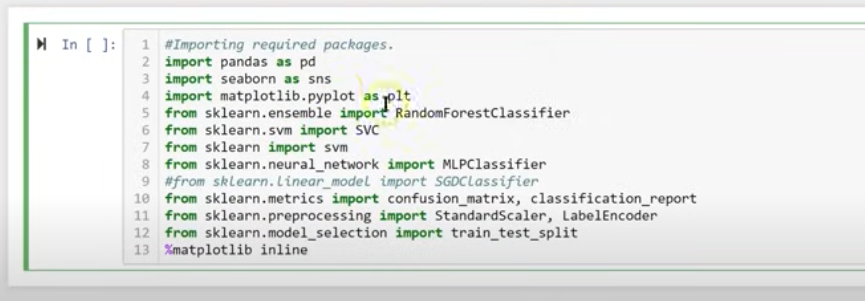

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = all_data.drop(['TourneyPTS', 'TourneyPerformance', 'School', 'Conf', 'Player', 'Name', 'Pos', 'Year', 'ROUND'], axis=1)
display(X)
y = all_data['TourneyPerformance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42) 
X_train.head()
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
display(X_train)

,Rank,G,FGM,3FG,FT,PTS,PPG,SEED,POWER RATING,POWER RATING RANK,Class,Height,Graud,Forward,Center
0,2,31,239,70,225,773,24.900000,16,72.800003,430,2,81,0,1,0
1,10,30,207,95,163,672,22.400000,13,75.500000,400,4,67,1,0,0
2,18,31,221,92,122,656,21.200001,2,92.300003,19,1,75,1,0,0
3,20,25,156,43,174,529,21.200001,7,83.099998,223,4,77,1,0,0
4,27,31,203,70,159,635,20.500000,1,92.199997,22,4,71,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,347,30,164,5,89,422,14.100000,5,83.599998,210,2,79,0,1,0
406,253,28,171,4,76,422,15.100000,6,87.599998,92,3,85,1,0,0
407,318,29,135,79,65,414,14.300000,10,82.800003,240,4,78,0,1,0
408,280,28,141,72,56,410,14.600000,3,87.099998,104,3,73,1,0,0


array([[ 0.5873523 , -0.0795484 , -0.72793   , ...,  0.70549054,
        -0.70549054,  0.        ],
       [ 0.63008778,  0.78062333, -0.02379324, ...,  0.70549054,
        -0.70549054,  0.        ],
       [-0.74813152,  0.20717551,  0.79769965, ...,  0.70549054,
        -0.70549054,  0.        ],
       ...,
       [ 0.42709424, -0.0795484 , -1.4614058 , ...,  0.70549054,
        -0.70549054,  0.        ],
       [-1.49600245,  0.20717551,  2.26465125, ...,  0.70549054,
        -0.70549054,  0.        ],
       [ 0.694191  ,  0.20717551, -0.87462516, ...,  0.70549054,
        -0.70549054,  0.        ]])

# models

## Random Forest Classifier


`n_estimators=200)` how many forest do you need this only thing we need work with 

this is good for small to med data sets 

In [130]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
display(pred_rfc)

array(['0', '0', '0', '0', '1', '0', '1', '1', '2', '1', '1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0',
       '1', '0', '0', '0'], dtype=object)

In [132]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        59
           1       0.36      0.29      0.32        17
           2       1.00      0.20      0.33         5
           3       0.00      0.00      0.00         1

    accuracy                           0.71        82
   macro avg       0.53      0.34      0.37        82
weighted avg       0.69      0.71      0.68        82

[[52  7  0  0]
 [12  5  0  0]
 [ 3  1  1  0]
 [ 0  1  0  0]]


/root/.cache/pypoetry/virtualenvs/ncaa-player-pool-9roMD56s-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/.cache/pypoetry/virtualenvs/ncaa-player-pool-9roMD56s-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/.cache/pypoetry/virtualenvs/ncaa-player-pool-9roMD56s-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

SVM Classifier

In [133]:
from sklearn.svm import SVC
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84        59
           1       0.38      0.18      0.24        17
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         1

    accuracy                           0.72        82
   macro avg       0.28      0.28      0.27        82
weighted avg       0.62      0.72      0.66        82

[[56  3  0  0]
 [14  3  0  0]
 [ 4  1  0  0]
 [ 0  1  0  0]]


/root/.cache/pypoetry/virtualenvs/ncaa-player-pool-9roMD56s-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/.cache/pypoetry/virtualenvs/ncaa-player-pool-9roMD56s-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/.cache/pypoetry/virtualenvs/ncaa-player-pool-9roMD56s-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

Neural Network

In [134]:
from sklearn.neural_network import MLPClassifier

mplc = MLPClassifier(hidden_layer_sizes=(21,21,21), max_iter=1000)
mplc.fit(X_train, y_train)
pred_mplc = clf.predict(X_test)
print(classification_report(y_test, pred_mplc))
print(confusion_matrix(y_test, pred_mplc))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84        59
           1       0.38      0.18      0.24        17
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         1

    accuracy                           0.72        82
   macro avg       0.28      0.28      0.27        82
weighted avg       0.62      0.72      0.66        82

[[56  3  0  0]
 [14  3  0  0]
 [ 4  1  0  0]
 [ 0  1  0  0]]


/root/.cache/pypoetry/virtualenvs/ncaa-player-pool-9roMD56s-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/.cache/pypoetry/virtualenvs/ncaa-player-pool-9roMD56s-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/.cache/pypoetry/virtualenvs/ncaa-player-pool-9roMD56s-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

In [135]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)
display(cm)

0.7073170731707317